# Investigando o Perfil do Profissional de Dados do Brasil 

Esse *notebook* foi elaborado utilizando como referência uma pesquisa realizada pela comunidade *Data Hackers*. A pesquisa foi realizada online em Novembro de 2019.

O *dataset* teve que ser anonimizado ao fazer a remoção de alguns *outliers* que poderiam identificar algum entrevistado, portanto há alguns dados que foram coletados que não estão disponíveis ao público. Além disso, também por consequência da anonimização os estados com menor incidência de resposta, como estados das regiões Norte, Nordeste e Centro-Oeste terão apenas a região indicada no *Dataset* utilizdo.

Cada uma das colunas são identificadas com uma tupla, para que assim seja possível identificar quais colunas são pertencentes a determinadas perguntas. O primeiro identificador é a pergunta e, para várias respostas, o segundo identificador é em relação a alternativa que foi escolhida. As perguntas que foram feitas:

**Observação**: As peruntas que estiverem riscadas são as que foram transformadas/apagadas no processo de anonimização.

`Pergunta_1 (P1)` = Idade? [Mascarada]

`Pergunta_2 (P2)` = Gênero? [Mascarada]

`Pergunta_3 (P3)` = Atualmente você vive no Brasil?

`Pergunta_4 (P4)` = ~~Em que país você vive hoje?~~

`Pergunta_5 (P5)` = Em que estado você vive hoje? [Mascarada]

`Pergunta_6 (P6)` = Na questão anterior você disse que vive em _____ . Esse é seu estado de origem (onde nasceu ou se formou)?

`Pergunta_7 (P7)` = ~~Qual seu estado de origem?~~

`Pergunta_8 (P8)` = Qual seu nível de ensino? 

`Pergunta_9 (P9)` = ~~Qual sua área de formação?~~

`Pergunta_10 (P10)` = Qual sua situação atual de trabalho? 

`Pergunta_11 (P11)` = ~~A empresa em que você trabalha pertence a qual setor?~~

`Pergunta_12 (P12)` = A empresa em que você trabalha possui quantos funcionários atualmente?

`Pergunta_13 (P13)` = Você atua como gestor?

`Pergunta_14 (P14)` = ~~Qual das opções abaixo definem melhor seu cargo de trabalho atual como gestor?~~

`Pergunta_15 (P15)` = ~~Qual das opções abaixo definem melhor seu cargo de trabalho atual?~~

`Pergunta_16 (P16)` = Qual sua faixa salarial atual? [Mascarada]

`Pergunta_17 (P17)` = Quanto tempo de experiência na área de dados você tem?

`Pergunta_18 (P18)` = Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?

`Pergunta_19 (P19)` = Você se considera um profissional que atua na área de Data Science?

`Pergunta_20 (P20)` = Quais dos métodos listados abaixo você costuma utilizar no trabalho?

`Pergunta_21 (P21)` = Quais das linguagens de programação listadas abaixo você utiliza no trabalho?

`Pergunta_22 (P22)` = Entre as linguagens de programação listadas abaixo, qual é a que você mais utiliza no trabalho? [Mascarada]

`Pergunta_23 (P23)` = Quais das fontes de dados listadas você já analisou no trabalho?

`Pergunta_24 (P24)` = Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo? Selecione no máximo duas opções que você mais utiliza.

`Pergunta_25 (P25)` = Quais das opções de Cloud listadas abaixo você utiliza no trabalho?

`Pergunta_26 (P26)` = Quais dos bancos de dados/fontes de dados listados abaixo você utiliza para consultar informações, e posteriormente analisar, no trabalho?

`Pergunta_27 (P27)` = Quais as Ferramentas de Business Intelligence você utiliza no trabalho?

`Pergunta_28 (P28)` = Quais as tecnologias são utilizadas como ferramenta de ETL no seu trabalho?

`Pergunta_29 (P29)` = Sua organização possui um Data Warehouse?

`Pergunta_30 (P30)` = Qual tecnologia utilizada como plataforma do Data Warehouse?

`Pergunta_31 (P31)` = Quais das iniciativas do Data Hackers que você já acessou/acompanhou?

`Pergunta_32 (P32)` = Entre as iniciativas do Data Hackers qual a sua preferida?

`Pergunta_33 (P33)` = De quais outras formas que você costuma se atualizar no mundo dos dados?

`Pergunta_34 (P34)` = Em quais dessas plataformas listadas abaixo você já iniciou/completou cursos na área de Data Science?

`Pergunta_35 (P35)` = Dentre as plataformas listadas abaixo qual foi a sua preferida para cursos de Data Science?

`Pergunta_36 (P36)` = Você deseja participar do sorteio?

Além dessas, algumas outras colunas foram derivadass:


`Derivado_1 (D1)` = Macrorregião em que mora

`Derivado_2 (D2)` = Macrorregião em que nasceu

`Derivado_3 (D3)` = Área de formação anonimizada

`Derivado_4 (D4)` = Setor de mercado anonimizado

`Derivado_5 (D5)` = Nível de gerência anonimizado

`Derivado_6 (D6)` = Cargo anonimizado

Esse projeto foi feito com base no notebook [Kaggle Pesquisa Data Hackers](https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019?select=data_dictionary.txt) e [Análise Flai](https://github.com/gitflai/WorkshopDataScience2021/blob/main/Dia1/Analise_FLAI_o%20perfil_do_prof_de_dados.ipynb).


In [1]:
#importar bibliotecas necessárias
import numpy as np 
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
#Lendo os dados 
df = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Perfil do Profissional de Dados/datahackers-survey-2019-anonymous-responses.csv')

df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


## Preparação dos Dados

Modificações necessárias:

* Categorizar o tamanho das empresas entre pequena, média e grande, tomando como base o número de funcionários de cada uma;
* Agrupar as profissões com características semelhantes;
* Recategorizar o tempo de experiência;
* Estabelecer ordem para a variável escolaridade;
* Criar uma variável discreta de salário através do ponto médio das faixas salariais;
* Categorizar a variável idade;
* Renomear as variáveis mais utilizadas a fim de facilitar o acesso delas;
* Criar subconjuntos de dados de cada uma das profissões de interesse.

In [3]:
print('As profissões encontradas no Dataset original: ')
print(df["('D6', 'anonymized_role')"].value_counts())
print('\nA quantidade de funcionários das empresas no dataset original: ')
print(df["('P12', 'workers_number')"].value_counts())
print('\nO tempo de experiência de cada funcionário: ')
print(df["('P17', 'time_experience_data_science')"].value_counts())
print('\nNível de escolaridade dos funcionários:')
print(df["('P8', 'degreee_level')"].value_counts())
print('\nRange dos salários dos funcionários:')
print(df["('P16', 'salary_range')"].value_counts())

As profissões encontradas no Dataset original: 
Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

A quantidade de funcionários das empresas no dataset original: 
Acima de 3000     393
de 101 a 500      333
de 11 a 50        204
de 501 a 1000     172
de 1001 a 3000    164
de 51 a 100       128
de 1 a 5           72
de 6 a 10          61
Name: (

In [4]:
#Agrupamento das profissões 
prof_map = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software',
            'Outras': 'Outras',
            'Data Scientist/Cientista de Dados': 'Cientista de Dados',
            'Data Analyst/Analista de Dados': 'Analista de Dados',
            'Business Intelligence/Analista de BI': 'Analista de BI',
            'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
            'Business Analyst/Analista de Negócios': 'Analista de BI',
            'Analista de Inteligência de Mercado': 'Analista de BI',
            'Engenheiro': 'Outras',
            'Analista de Marketing': 'Outras',
            'Engenheiro de Machine Learning': 'Cientista de Dados',
            'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
            'Estatístico': 'Cientista de Dados',
            'Economista': 'Outras'}

df['profissao'] = df["('D6', 'anonymized_role')"].map(prof_map)

#Criando tamanho da empresa
tam_map = {'de 1 a 5': 'Pequena',
            'de 6 a 10': 'Pequena',
            'de 11 a 50': 'Pequena',
            'de 51 a 100': 'Pequena',
            'de 101 a 500': 'Média',
            'de 501 a 1000': 'Média',
            'de 1001 a 3000': 'Grande',
            'Acima de 3000': 'Grande'}

#Recategorizando experiência
temp_xp_ds = {
    'Menos de 1 ano': 'Até 1 ano',
    'Não tenho experiâcnia na área de dados': 'Até 1 ano',
    'de 1 a 2 anos': 'De 1 a 3 anos',
    'de 2 a 3 anos': 'De 1 a 3 anos',
    'de 4 a 5 anos': 'De 3 a 5 anos',
    'de 6 a 10 anos': 'Maior que 5',
    'Mais de 10 anos': 'Maior que 5'
}


#Ordeando escolaridade
esc_map = CategoricalDtype(
    ['Prefiro não informar', 'Não tenho graduação formal', 'Estudante de Graduação', 'Graduação/Bacharelado', 'Pós-graduação', 'Mestrado', 'Doutorado ou Phd'], ordered = True
)

#Discretizando salário
sala_map =  {'Menos de R$ 1.000/mês': 1000,
            'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
            'de R$ 2.001/mês a R$ 3000/mês': 2500,
            'de R$ 3.001/mês a R$ 4.000/mês': 3500,
            'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
            'de R$ 6.001/mês a R$ 8.000/mês': 7000,
            'de R$ 8.001/mês a R$ 12.000/mês': 10000,
            'de R$ 12.001/mês a R$ 16.000/mês': 14000,
            'de R$ 16.001/mês a R$ 20.000/mês': 18000,
            'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
                    'Acima de R$ 25.001/mês': 25000}

#Discretizando a idade
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']

#Criando um novo dataset com as informações de maior interesse
df['idade'] = pd.cut(df["('P1', 'age')"], bins = cortes, labels = nomes)
df['salario'] = df["('P16', 'salary_range')"].map(sala_map)
df['tamanho_da_empresa'] = df["('P12', 'workers_number')"].map(tam_map)
df['gestor'] = df["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
df['se_considera_ds'] = df["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})
df['sexo'] = df["('P2', 'gender')"]
df['experiencia_ds'] = df["('P17', 'time_experience_data_science')"].map(temp_xp_ds)
df['tipo_de_trabalho'] = df["('P10', 'job_situation')"]
df['escolaridade'] = df["('P8', 'degreee_level')"].astype(esc_map)
df['area_de_formacao'] = df["('D3', 'anonymized_degree_area')"]
df['setor_de_mercado'] = df["('D4', 'anonymized_market_sector')"]
df['plataforma_favorita'] = df["('P35', 'data_science_plataforms_preference')"]

#Criando conjunto de dados convenientes através de filtros

#Profissões de dados
lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']
pds = df[df['profissao'].isin(lista)]
cds = df[df['profissao'] == 'Cientista de Dados']
ads = df[df['profissao'] == 'Analista de Dados']
abi = df[df['profissao'] == 'Analista de BI']
eds = df[df['profissao'] == 'Engenheiro de Dados']

## Paleta de Cores

A paleta de cores criada tem como função padronizar as visualizações dos gráficos.

In [5]:
#Criando paleta de cores
cores = ['#080047','#110099','#3219FF','#197CFF','#6BAAFF','#6BDEFF','#A8ECFF']
cores1 = ['darkblue']
cores2 = ['#080047','#197CFF']
cores3 = ['#080047','#197CFF','#A8ECFF']
cores4 = ['#080047','#3219FF','#6BAAFF','#A8ECFF']
cores_venn = ['#080047','#197CFF','#778899']

## Análise Exploratória

Nessa análise exploratória primeiro serão avaliadas as variáveis individualmente, depois será feito um cruzamento das informações obtidas a fim de obter mais respostas.

### Principais Profissões

Será feita a relação de cada profissão individualmente, seus salários e um agrupamento de acordo com a característica de cada uma delas.

In [6]:
def plotar_grafico(conjunto, cor, title, xlabel):
    fig, ax = plt.subplots(figsize = (16, 8))
    ax = conjunto.value_counts(ascending=True).plot(kind = 'barh', legend = False, color = cor)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(title, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 12);

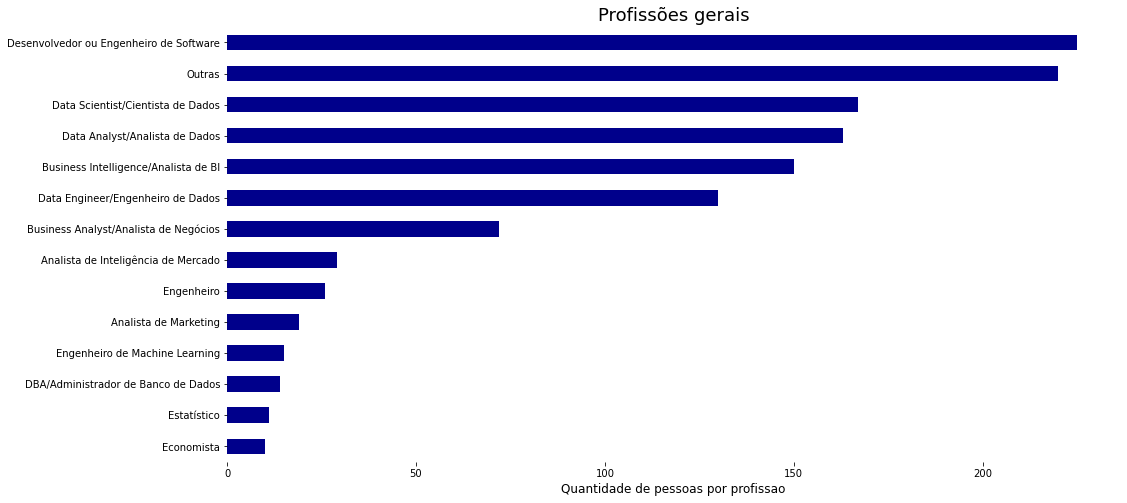

In [7]:
#Profissões gerais desagrupadas
plotar_grafico(df["('D6', 'anonymized_role')"], cores1, 'Profissões gerais', 'Quantidade de pessoas por profissao')

Nota-se que as profissões que mais se destacam são a de Desenvolvedor e Engenheiro de Software, Cientista de Dados, Analista de Dados e Analisa de BI. 

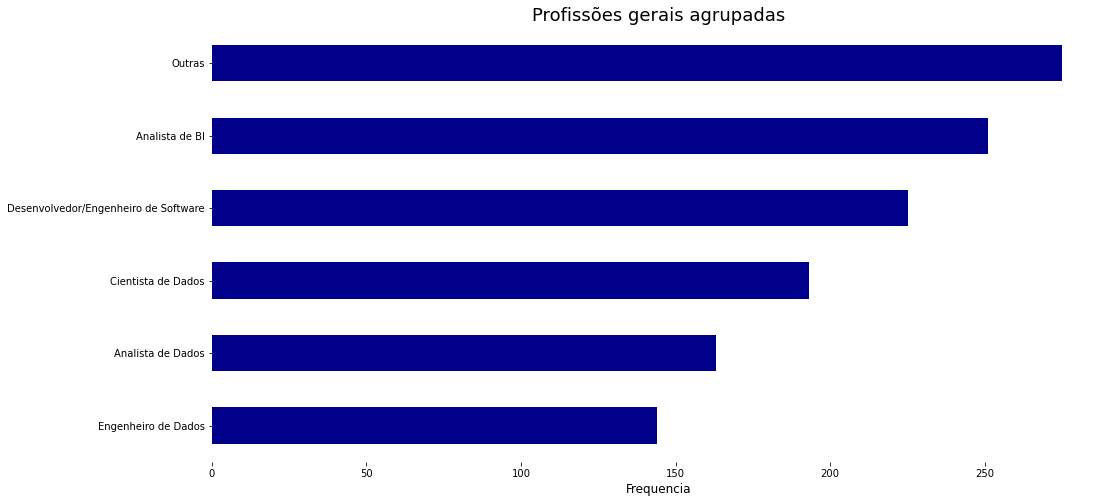

In [8]:
#Profissões gerais agrupadas
plotar_grafico(df["profissao"], cores1, 'Profissões gerais agrupadas', 'Frequencia')

Com o agrupamento das profissões feito é possível perceber o aparecimento de diferentes profissões como as mais preponderantes. O agrupamento das profissões permite que as profissões de dados fiquem mais vísiveis e esse é o objetivo.

In [9]:
def configuracoes_grafico(titulo, xlabel, ylabel):
    plt.spines['right'].set_visible(False)
    plt.spines['bottom'].set_visible(False)
    plt.spines['left'].set_visible(False)
    plt.spines['top'].set_visible(False)
    plt.set_title(titulo, fontsize = 18)
    plt.set_xlabel(xlabel, fontsize = 14)
    plt.set_ylabel(ylabel, fontsize = 14)

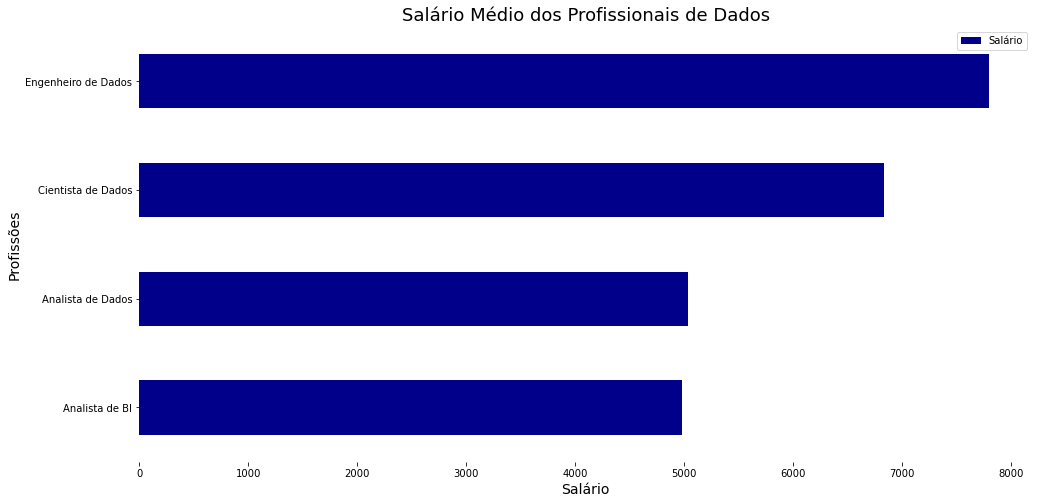

In [10]:
#Salários gerais
lista_p = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']
banco_tmep = {}
for var_tmp in lista_p:
    banco_tmep[var_tmp] = [df['salario'][df['profissao'] == var_tmp].mean()]

banco_tmep = pd.DataFrame(banco_tmep)
banco_tmep = banco_tmep.round(2).T
banco_tmep.columns = ['Salário']
banco_tmep = banco_tmep.sort_values('Salário')

#Gráfico
plt = banco_tmep.plot(kind = 'barh', figsize = (16, 8), color = cores1)
configuracoes_grafico('Salário Médio dos Profissionais de Dados', 'Salário', 'Profissões')

Pelo gráfico é possível observar que as duas profissões que possuem maior salário médio são Engenheiro de Dados e Cientista de Dados, possuindo uma média superior a 6500,00 reais. Um ponto importante é que essa pesquisa considera profissionais de todos os níveis, ou seja, há profissionais júniores, plenos, sêniors visto o salário médio é até elevado, ainda mais se comparado ao salário médio do Brasil, que não chega nem a R$ 3000,00.

## Cientista de Dados

Eu, particularmente, tenho maior interesse em saber dos dados relacionados dos Cientistas de Dados, visto que é a profissão que eu escolhi exercer, portantto será aprofundado um pouco mais sobre essa profissão.

In [11]:
print(f'O salário médio dos Cientista de Dados é de: R$ {df.salario.mean():.2f}.')

O salário médio dos Cientista de Dados é de: R$ 6283.24.


### Idade, gênero e correlações

Duas variáveis costumam se destacar porque na maior parte das vezes essas variáveis são associadas a desigualdade, essas duas variáveis são gênero e idade. 

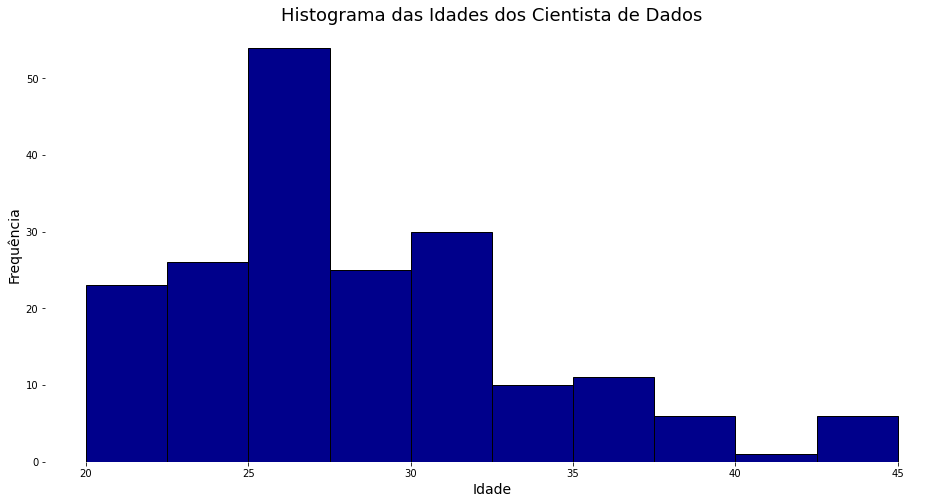

In [12]:
#Idade
plt = cds["('P1', 'age')"].plot(kind = 'hist', edgecolor = 'black', color = cores1, figsize = (16, 8))
configuracoes_grafico('Histograma das Idades dos Cientista de Dados', 'Idade', 'Frequência')

Observa-se que das pessoas que responderam a pesquisa a idade dos Cientista de Dados vai de 20 a 45 anos, havendo uma maior predominância entre 25 e 30 anos.

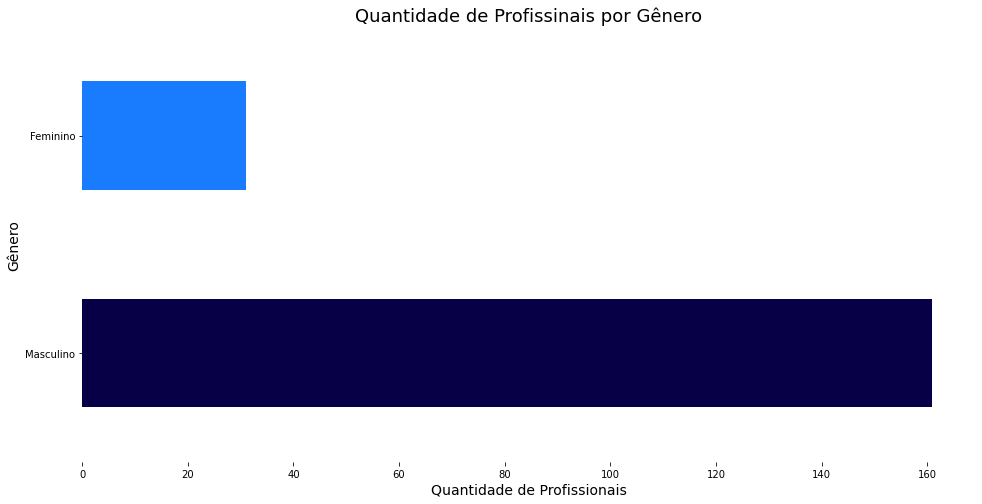

In [13]:
#Gênero
plt = cds['sexo'].value_counts().plot(kind = 'barh', color = cores2, figsize = (16, 8))
configuracoes_grafico('Quantidade de Profissinais por Gênero', 'Quantidade de Profissionais', 'Gênero')

Percebe-se que há uma grande discrepância da quantidade de profissionais do sexo masculino para as profissionais do sexo feminino. O mercado de programação é majoratiamente masculino hoje, isso é fato, mas tem muitas mulheres - e outras muitas virão - aparecendo para deixar esse mercado mais bem dividido. 

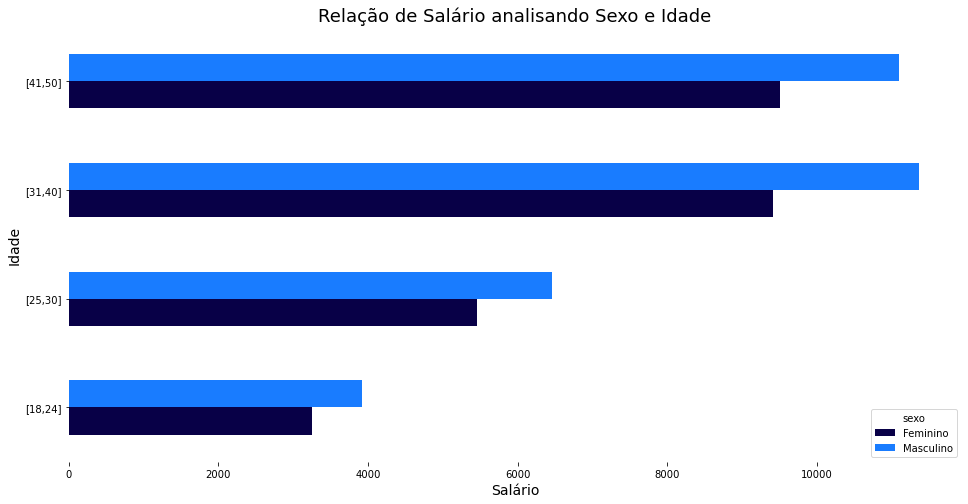

In [14]:
#Salário: Sexo x Idade
plt = cds.groupby(['sexo', 'idade']).mean()['salario'].unstack().T.plot(kind = 'barh', color = cores2, figsize = (16, 8))
configuracoes_grafico('Relação de Salário analisando Sexo e Idade', 'Salário', 'Idade')

Como é de se esperar, quanto maior a idade do profissional maior também será o seu salário, visto que quanto maior experiência mais bem remunerado a pessoa será. Nota-se que os salários das faixas de idade de 31 a 40 e de 41 a 50 anos é bem similar. Outro ponto muito importante a ser notado é que independente da idade as mulheres, hoje, recebem em média menor do que os homens, acredito muito que essa realidade vai ser alturada e mais igualada a medida que mais mulheres entrarem no mercado. 

### Tamanho da Empresa

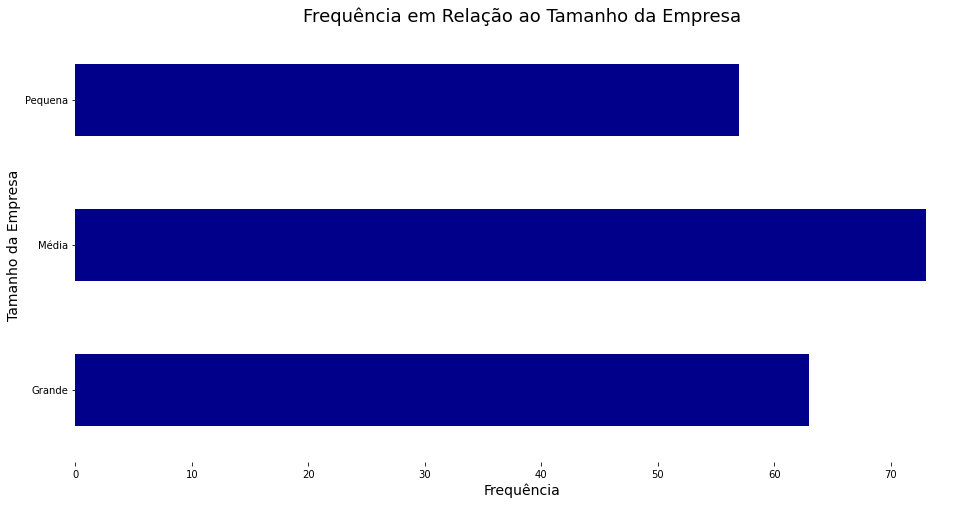

In [15]:
#Frequencia: Tamanho da empresa
plt = cds.groupby('tamanho_da_empresa').count()['salario'].plot(kind = 'barh', color = cores1, figsize = (16, 8))
configuracoes_grafico('Frequência em Relação ao Tamanho da Empresa', 'Frequência', 'Tamanho da Empresa')

Percebe-se que entre todas as classes de tamanhos (pequena, média, grande) a que é mais frequente é a média, porém não há grande discrepância em relação aos demais tamanhos.

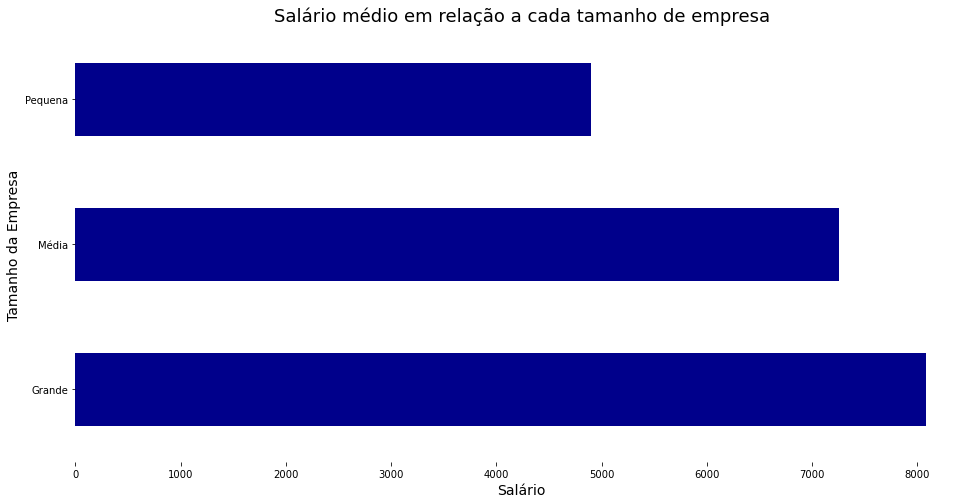

In [16]:
#Salario: Tamanho da empresa
plt = cds.groupby('tamanho_da_empresa').mean()['salario'].plot(kind = 'barh', color = cores1, figsize = (16, 8))
configuracoes_grafico('Salário médio em relação a cada tamanho de empresa', 'Salário', 'Tamanho da Empresa')

A média salarial mais elevada é para as empresas grandes. Nota-se também que há um aumento da média salarial a medida que o tamanho da empresa também aumenta. Isso, de certa forma, é esperado porque empresas grandes não são grandes a toa, elas tem que ter pessoas boas trabalhando lá e pessoas boas são mais caras já que elas agregam mais valor. 

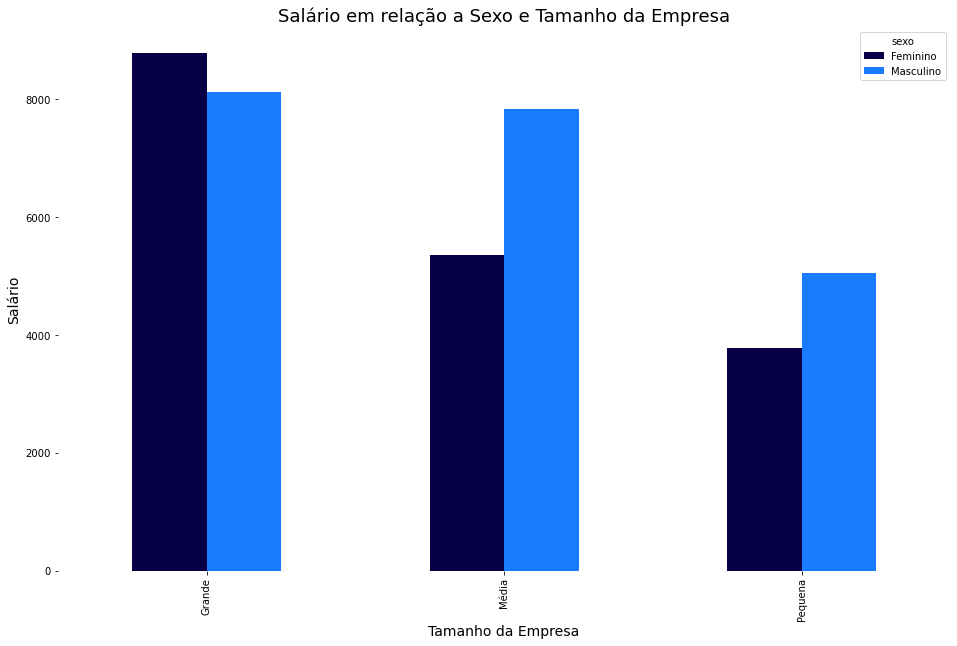

In [19]:
#salário: Sexo x Tamanho da Empresa
plt = cds.groupby(['sexo', 'tamanho_da_empresa']).mean()['salario'].unstack().T.plot(kind = 'bar', color = cores2, figsize = (16, 10))
configuracoes_grafico('Salário em relação a Sexo e Tamanho da Empresa', 'Tamanho da Empresa', 'Salário')

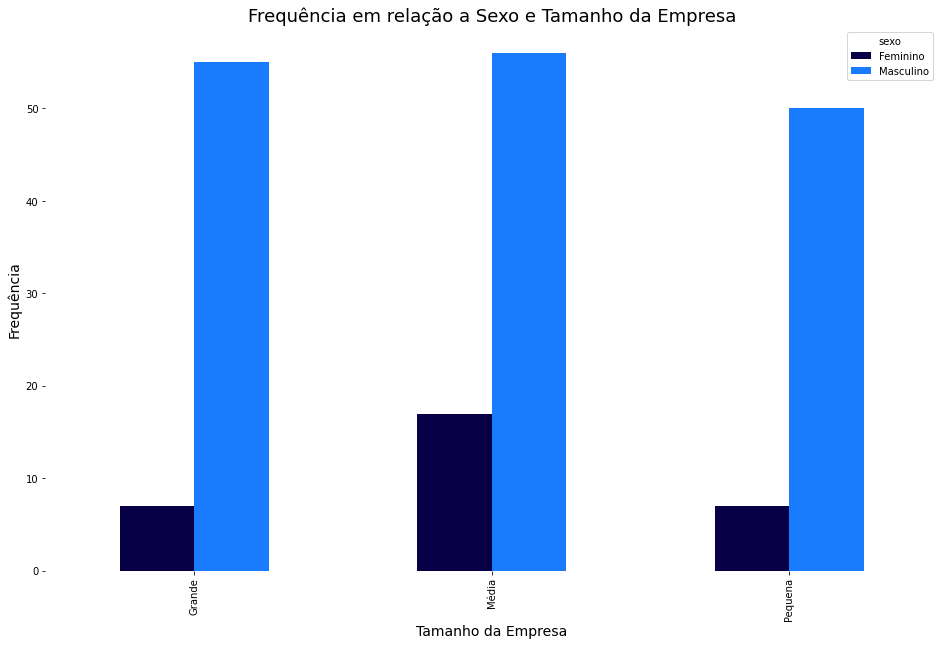

In [20]:
#Frequencia: Sexo x Tamanho da Empresa
plt = cds.groupby(['sexo', 'tamanho_da_empresa']).count()['salario'].unstack().T.plot(kind = 'bar', color = cores2, figsize = (16, 10))
configuracoes_grafico('Frequência em relação a Sexo e Tamanho da Empresa', 'Tamanho da Empresa', 'Frequência')

Ao analisar o gráfico de salário médio dos funcionários para cada porte de empresa percebe-se que pela primeira vez os salários das mulheres são superiores aos dos homens, nas empresas de grande porte, porém quando faz a análise conjunta da quantidade de pessoas que tem em cada empresa percebe-se que há poucas mulheres que responderam a pesquisa e estão em uma empresa de grande porte, portanto essa resposta pode não apresentar uma forte significância estatística. O ideal seria obter mais respostas de mulheres para realmente poder fazer um comparativo mais real. 

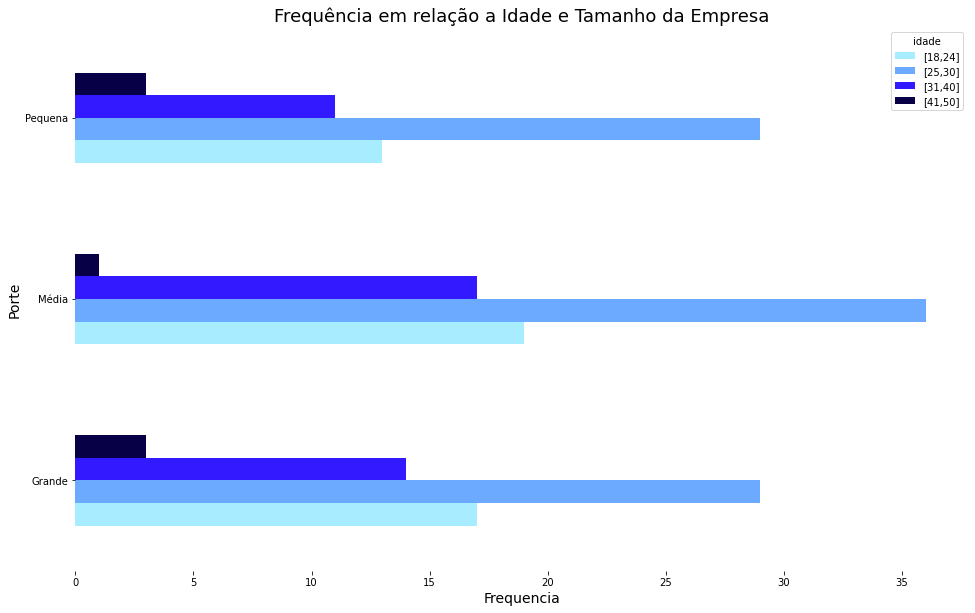

In [23]:
#Frequendia: Idade x Tamanho da Empresa
plt = cds.groupby(['idade', 'tamanho_da_empresa']).count()['salario'].unstack().T.plot(kind = 'barh', color = cores4[::-1], figsize = (16, 10))
configuracoes_grafico('Frequência em relação a Idade e Tamanho da Empresa', 'Frequência', 'Porte')

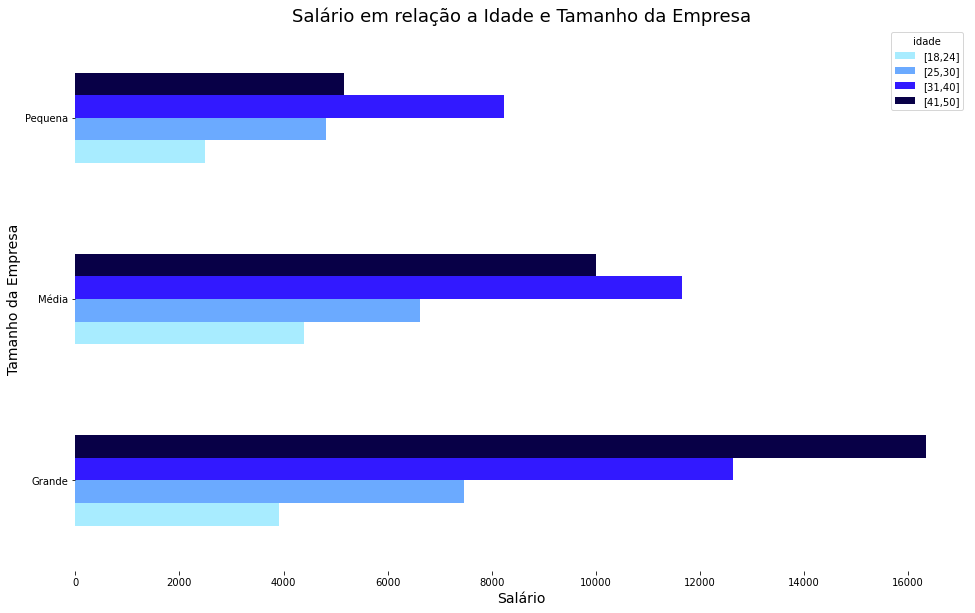

In [26]:
#Salario: Idade x Tamanho da Empresa
plt = cds.groupby(['idade', 'tamanho_da_empresa']).mean()['salario'].unstack().T.plot(kind = 'barh', color = cores4[::-1], figsize = (16, 10))
configuracoes_grafico('Salário em relação a Idade e Tamanho da Empresa', 'Salário' , 'Tamanho da Empresa')

No gráfico de frequência é vísivel que pessoas na faixa etária de 41 a 50 anos são minoria em relação as demais faixas etárias, além disso é perceptível que o perfil das idades é semelhante em todos os portes de empresa. Já em relação aos salários essa constância não permanece, quanto maior o tamanho das empresas mais as pessoas de 41 a 50 anos recebem, porém conforme foi dito em relação ao salários das mulheres também pode ser dito nessa análise, o número de pessoas entre 41 e 50 é pequeno se comparado com os demais, então não é possível afirmar com tanta certeza por causa da ausência de precisão estatística. Apesar dessa ausência é de ser esperar que pessoas que tenham mais experiência (normalmente as mais velhas) recebem mais devido ao reconhecimento do quanto essas pessoas podem agregar para as empresas. 

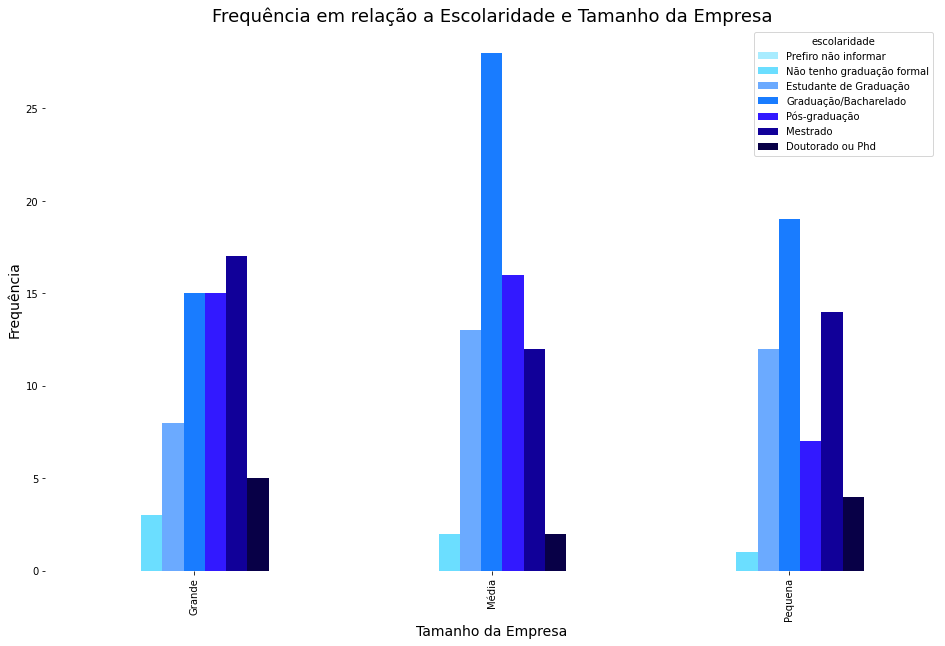

In [28]:
#Frequencia: Escolaridade x Tamanho da Empresa
plt = cds.groupby(['escolaridade', 'tamanho_da_empresa']).count()['salario'].unstack().T.plot(kind = 'bar', color = cores[::-1], figsize = (16, 10))
configuracoes_grafico('Frequência em relação a Escolaridade e Tamanho da Empresa', 'Tamanho da Empresa' , 'Frequência')

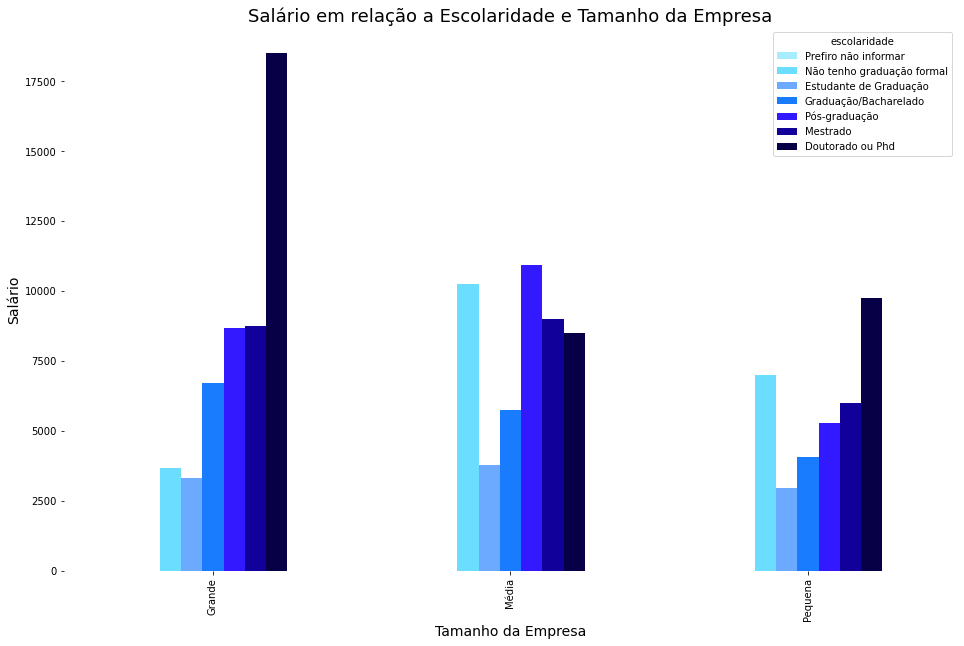

In [29]:
#Salario: Escolaridade x Tamanho da Empresa
plt = cds.groupby(['escolaridade', 'tamanho_da_empresa']).mean()['salario'].unstack().T.plot(kind = 'bar', color = cores[::-1], figsize = (16, 10))
configuracoes_grafico('Salário em relação a Escolaridade e Tamanho da Empresa', 'Tamanho da Empresa' , 'Salário')

As empresas de grande porte porte possuem em sua maioria funcionários com mestrado, pós-graduação e graduação, enquanto que as empresas de médio e pequeno porte possuem uma grande predominância de estudantes de graduação, além disso percebe-se que há mais pessoas que não possuem graduação formal nessas empresas do que nas de grande porte. Já em relação ao salário percebe-se que as empresas grandes pagam mais a medida que o seu funcionário tem tem maior grau de formação, é possível ver a discrepância de salário de uma pessoa que tem doutorado ou PhD e trabalha em uma empresa grande, das demais formações, o salário chega a ser quase o dobro. Nas empresas de médio porte não há uma relação tão linear, por incrível que pareça as pessoas que possuem pós-graduação recebm mais do que as que tem mestrado e doutorado, fazer a pós graduação pode até ser incentivo da própria empresa para que o funcionário possa agregar para ela ainda mais e que possa continuar lá por mais tempo. Nas empresas de pequeno porte há um crescimento de salário a medida que a graduação aumenta também, isso leva a pensar que as pessoas com maior graduação são os líderes das empresas podendo até ser os donos.

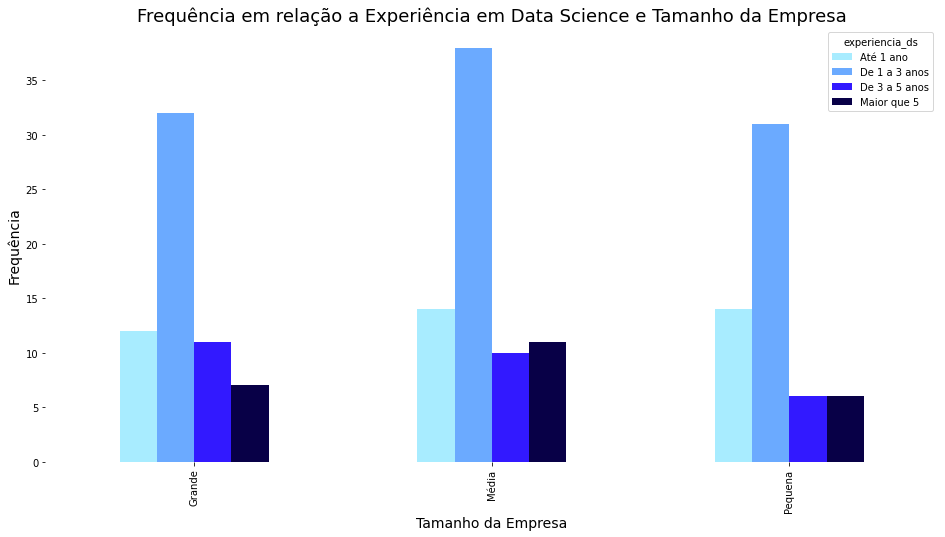

In [31]:
#Frequencia: Experiencia em Data Science x Tamanho da Empresa
plt = cds.groupby(['experiencia_ds', 'tamanho_da_empresa']).count()['salario'].unstack().T.plot(kind = 'bar', color = cores4[::-1], figsize = (16, 8))
configuracoes_grafico('Frequência em relação a Experiência em Data Science e Tamanho da Empresa', 'Tamanho da Empresa' , 'Frequência')

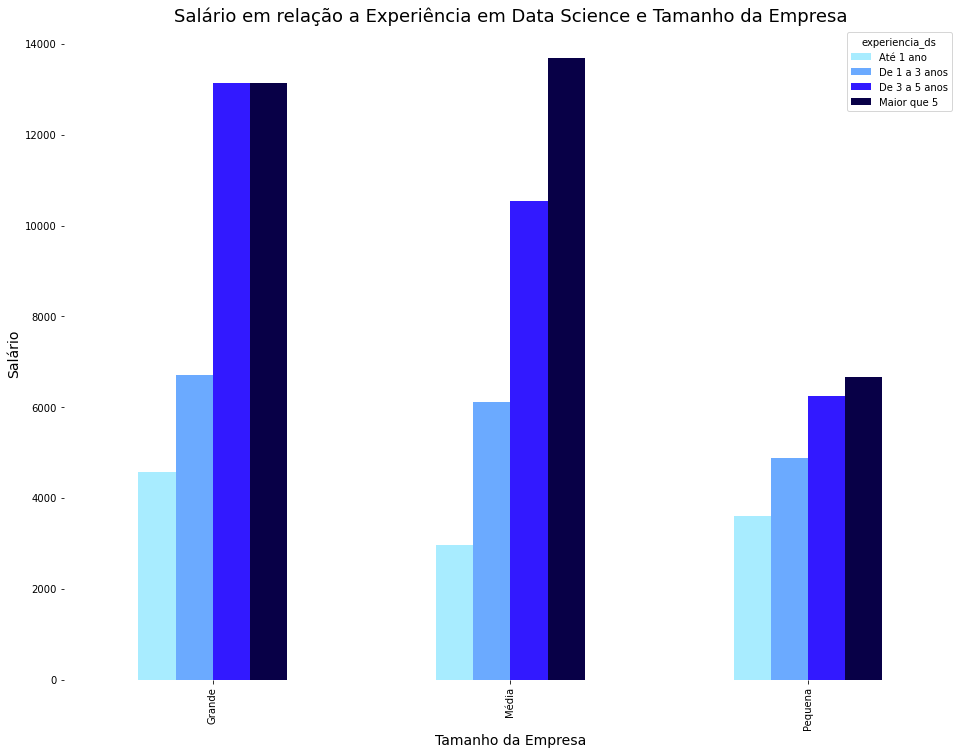

In [33]:
#Salario: Experiencia em Data Science x Tamanho da Empresa
plt = cds.groupby(['experiencia_ds', 'tamanho_da_empresa']).mean()['salario'].unstack().T.plot(kind = 'bar', color = cores4[::-1], figsize = (16, 12))
configuracoes_grafico('Salário em relação a Experiência em Data Science e Tamanho da Empresa', 'Tamanho da Empresa' , 'Salário')

Idependente do tamanho da empresa o tempo predominante de experiência em Data Science é de 1 a 3 anos, de certa forma isso era até esperado porque é uma profissão nova e ainda tem muito potencial de crescimento aqui no Brasil. Outro ponto que Idependente do tamanho da empresa é que quanto maior o tempo de experiência maior é o salário das pessoas, isso também é esperado e bastante desejado, visto que quanto mais experiência a pessoa tem mais conhecimento ela terá e, por consequência, mais ela vai agregar para a empresa, portanto a pessoa merece ser melhor remunerada por isso. O fato da pessoa que tem mais experiência receber mais é tão verdade que há os níveis junior, pleno e sênior, quando a pessoa conhece mais sobre a área, ela irá subir de nível.

### Setor do Mercado

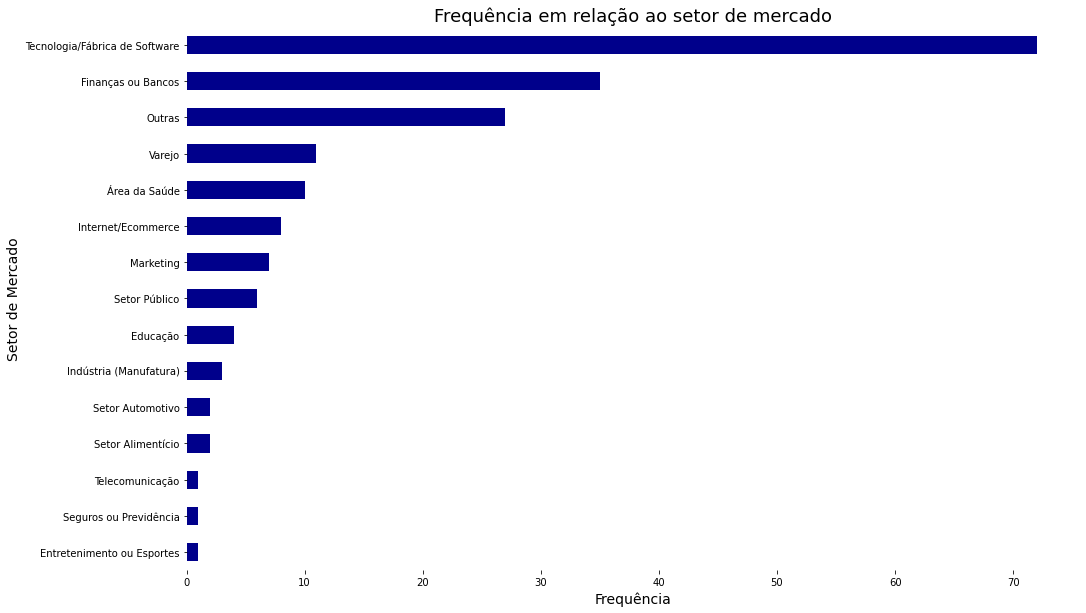

In [37]:
#Frequência: Setor de Mercado
plt = cds.groupby('setor_de_mercado').count()['salario'].sort_values().plot(kind = 'barh', color = cores1, figsize = (16, 10))
configuracoes_grafico('Frequência em relação ao setor de mercado', 'Frequência' , 'Setor de Mercado')

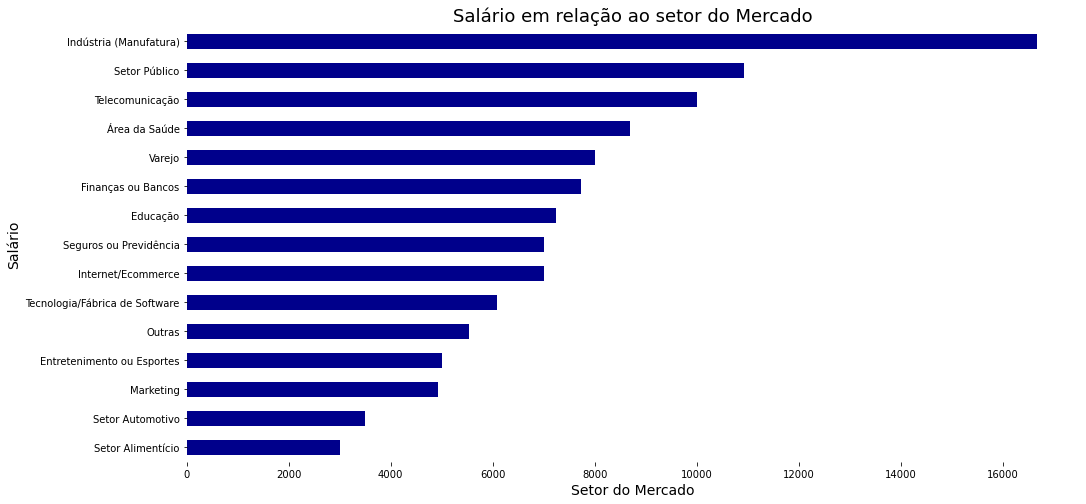

In [38]:
#Salario: Setor de Mercado
plt = cds.groupby('setor_de_mercado').mean()['salario'].sort_values().plot(kind = 'barh', color = cores1, figsize = (16, 8))
configuracoes_grafico('Salário em relação ao setor do Mercado', 'Setor do Mercado' , 'Salário')

Ao analisar o gráfico dos maiores salários em relação ao setor da empresa uma surpresa grande é perceber que o setor de tecnologia não é o que paga melhor para os Cientista de Dados, na verdade é bem pelo contrário, esse setor é um dos que menos pagam. Entre os setores com melhores salários estão a Indústria, setor público, telecomunicação e área da saúde. Já em relação a quantidade de funcionários em cada setor era esperado que o setor de tecnologia fosse o que mais possui profissionais de dados e essa expectativa foi correspondida, seguida do setor de finanças, varejo e saúde.

### Linguagens de Programação

In [41]:

def n_inner(p, r, s, prof):

    if prof == "cds":  
        lista = ['Cientista de Dados']

    temp = df[(df["('P21', 'r')"] == r) &
               (df["('P21', 'python')"] == p) & 
               (df["('P21', 'sql_')"] == s) & 
               (df['profissao'].isin(lista))].shape[0]

    return temp

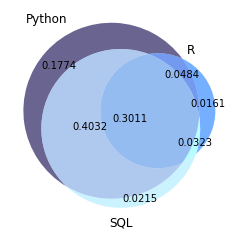

In [44]:
lista = [n_inner(1,0,0,"cds"), n_inner(0,1,0,"cds"), n_inner(1,1,0,"cds"),
         n_inner(0,0,1,"cds"), n_inner(1,0,1,"cds"), n_inner(0,1,1,"cds"),
         n_inner(1,1,1,"cds")]

s = sum(lista)

lista = [x / s for x in lista]

lista = np.around(lista, 4)
venn3(subsets=lista, set_labels=('Python', 'R', 'SQL'), alpha=0.6, set_colors = cores3)

O **diagrama de venn** é uma forma de representar graficamente um conjunto, a sua ideia é facilitar o entendimento de algumas operações de conjunto: relação de inclusão, união, interseção, diferença, conjunto complementar.

**Através do diagrama de venn do Cientista de Dados, observa-se um perfil de uso dos 3 softwares Python, R e SQL, de uso predominante do Python com 93% das respostas. Python também é a maior linguagem de programação com uso exclusivo, com 18%, seguido por SQL com 2% e R com 2%. Os profissionais que usam apenas Python e SQL representam 40% das respostas. Já os que usam apenas Python e R somam 5%, apenas R e SQL 3% e os que usam R Python e SQL representam 30%. Nota-se que o perfil do profissional está fortemente ligado a Python e SQL, e o R como uma ferramenta complementar, para uso mais específico**

### Métodos mais utilizados

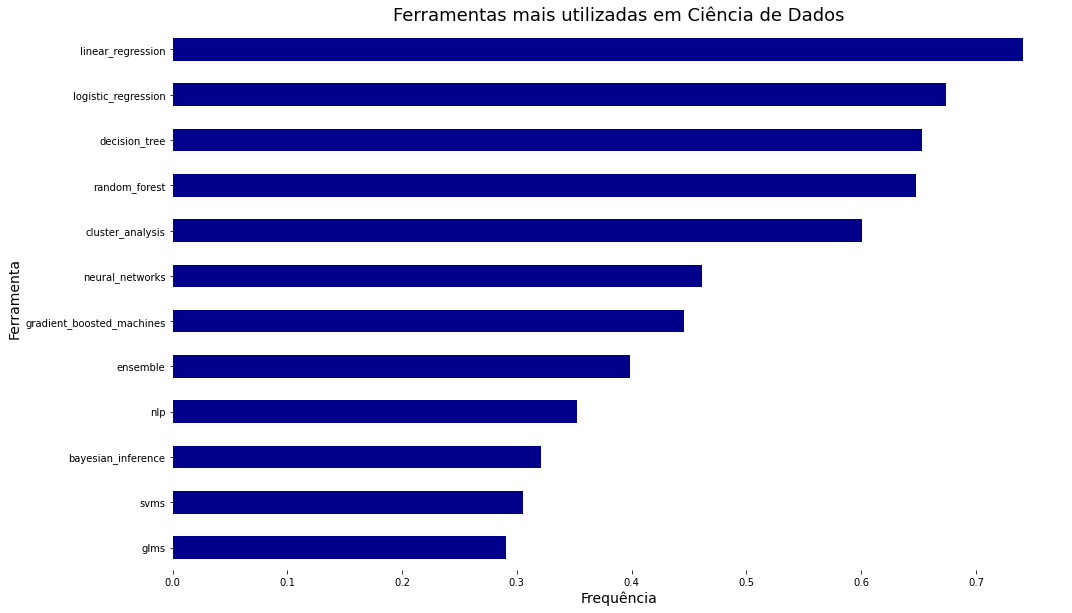

In [45]:
#Ferramentas mais utilizadas por Data Scientist

temp = cds.filter(regex='P20').sum().sort_values()/cds.shape[0]
index_antigo = list(temp.index)
tira_caracteres = ['P20', "'", ',', '(',')', ' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp, '') for w in index_antigo]
temp.index = index_antigo
plt = temp[(temp>=0.20) & (temp != 'no_listed_methods')].plot(kind = 'barh', color = cores1, figsize = (16, 10))
configuracoes_grafico('Ferramentas mais utilizadas em Ciência de Dados', 'Frequência' , 'Ferramenta')

Entre os métodos mais utilizados os que se destacam mais são: regressão linear, regressão logística, árvores de decisão e floresta de decisão.

### Métodos utilizados por tamanho da empresa

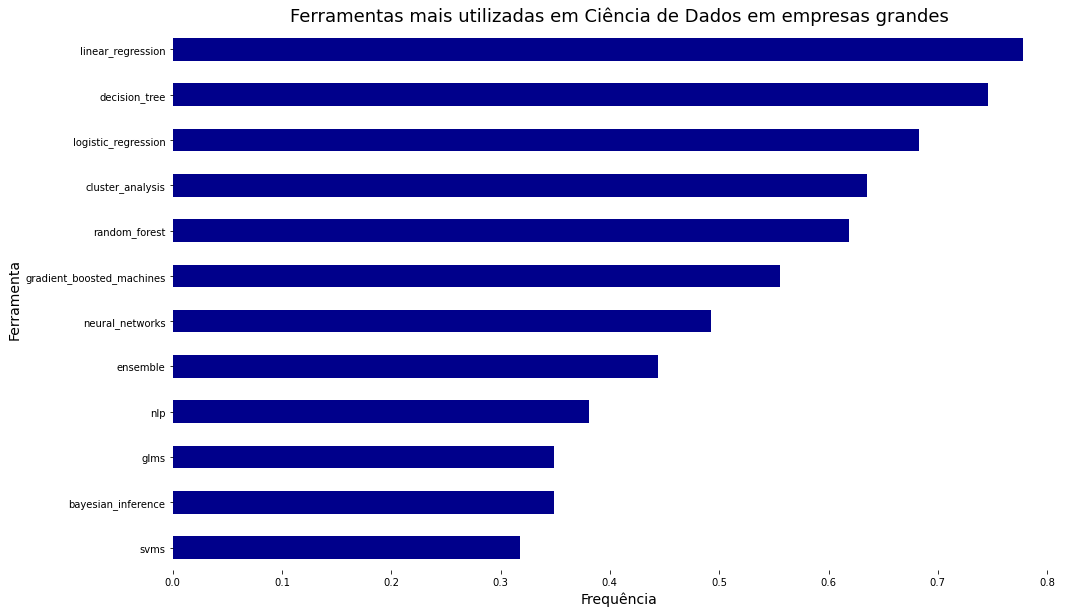

In [46]:
#Empresa grande

data_temp = cds[cds['tamanho_da_empresa'] == 'Grande']
temp = data_temp.filter(regex = 'P20').sum().sort_values()/data_temp.shape[0]
index_antigo = list(temp.index)
tira_caracteres = ['P20', "'", ',', '(',')', ' ']
for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp, '') for w in index_antigo]
temp.index = index_antigo
plt = temp[(temp>=0.20) & (temp != 'no_listed_methods')].plot(kind = 'barh', color = cores1, figsize = (16, 10))
configuracoes_grafico('Ferramentas mais utilizadas em Ciência de Dados em empresas grandes', 'Frequência' , 'Ferramenta')

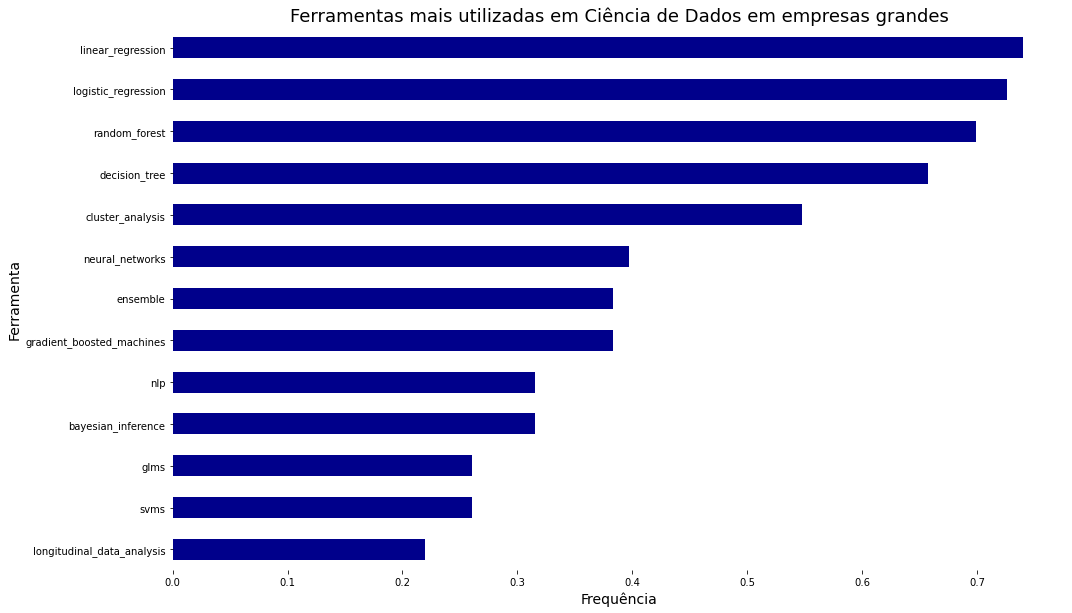

In [47]:
#Empresa média

data_temp = cds[cds['tamanho_da_empresa'] == 'Média']
temp = data_temp.filter(regex = 'P20').sum().sort_values()/data_temp.shape[0]
index_antigo = list(temp.index)
tira_caracteres = ['P20', "'", ',', '(',')', ' ']
for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp, '') for w in index_antigo]
temp.index = index_antigo
plt = temp[(temp>=0.20) & (temp != 'no_listed_methods')].plot(kind = 'barh', color = cores1, figsize = (16, 10))
configuracoes_grafico('Ferramentas mais utilizadas em Ciência de Dados em empresas grandes', 'Frequência' , 'Ferramenta')

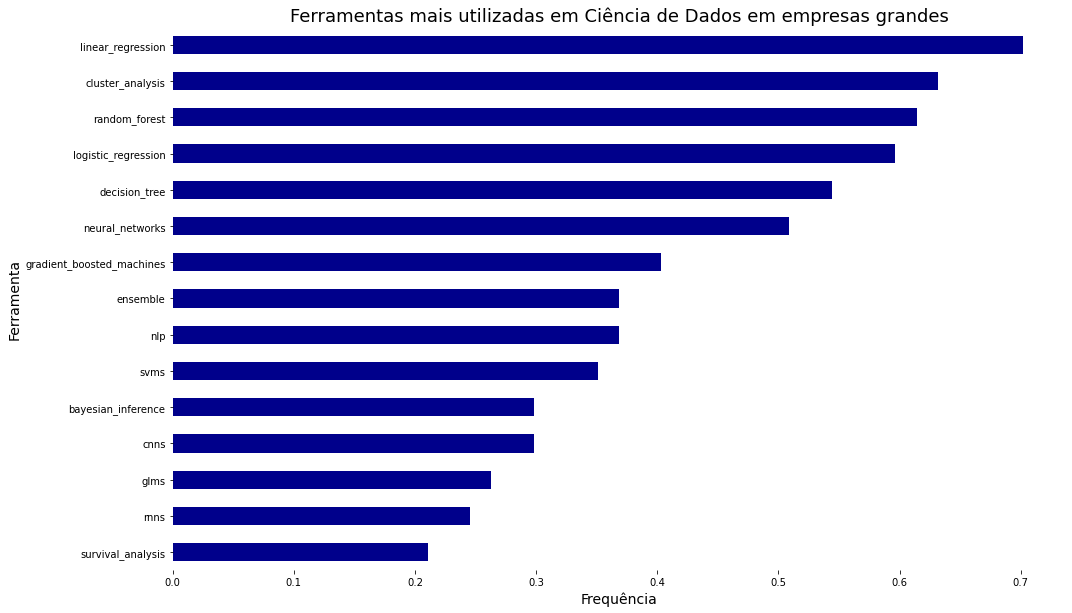

In [48]:
#Empresa pequenas

data_temp = cds[cds['tamanho_da_empresa'] == 'Pequena']
temp = data_temp.filter(regex = 'P20').sum().sort_values()/data_temp.shape[0]
index_antigo = list(temp.index)
tira_caracteres = ['P20', "'", ',', '(',')', ' ']
for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp, '') for w in index_antigo]
temp.index = index_antigo
plt = temp[(temp>=0.20) & (temp != 'no_listed_methods')].plot(kind = 'barh', color = cores1, figsize = (16, 10))
configuracoes_grafico('Ferramentas mais utilizadas em Ciência de Dados em empresas grandes', 'Frequência' , 'Ferramenta')

### Salário médio por método utilizado

In [49]:
#Cientista de Dados
col_temp = cds.filter(regex = 'P20').columns

banco_tmep = {}

for var_tmp in col_temp:
    banco_tmep[var_tmp] = [cds['salario'][cds[var_tmp] == 1].mean()]

temp = pd.DataFrame(banco_tmep).T

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo

temp[0] = temp[0].round(2)

temp[1] = list(cds.filter(regex = 'P20').sum())

temp.columns = ["Salário","N"]

temp.sort_values("Salário",ascending = False,)

,Salário,N
gans,10111.11,9
hmms,8625.00,8
rnns,8585.71,35
ensemble,8344.16,77
longitudinal_data_analysis,7852.94,34
svms,7847.46,59
cluster_analysis,7806.03,116
gradient_boosted_machines,7738.37,86
cnns,7718.75,32
decision_tree,7571.43,126


## Comentários

**Algumas variáveis não foram analisadas por acreditarmos que suas informações não representam a realidade da população referenciada. Um exemplo é a variável de localização. As regiões como norte e nordeste tiveram informações removidas, a fim de preservar a identidade dos participantes da pesquisa. Como essa remoção pode ter sido realizada de maneira não aleatória, preferimos não utilizar essa variável nas análises.

Vejam quantas informações foram extraídas desse conjunto de dados. Por incrível que pareça, mesmo após mais de 1 ano da disponibilização dos dados, não vimos uma análise tão completa e profunda como essa. E há muito mais que ainda pode ser feito. Daqui em diante, seria interessante aprofundar o estudo em relação a testes estatísticos e verificar quais diferenças, de fato, existem nesse gigante e complexo mercado.**